# Shell AICTE Intern Project

# Supply Chain Emissions Modeling Using Industry and Commodity Data (2010–2016)

Problem Statement:

You have annual supply chain emission data from 2010–2016 categorized into industries and commodities. The goal is to develop a regression model that can predict the Supply Chain Emission Factors with Margins based on descriptive and quality metrics (substance, unit, reliability, temporal/geographical/technological/data collection correlations, etc.).

## Step 1: Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import joblib
import os

## Step 2: Load Dataset

In [2]:
excel_file='SupplyChainEmissionFactorsforUSIndustriesCommodities.xlsx'
years=range(2010, 2017)
years[0]

2010

In [3]:
# Viewing the dataset
df_1 = pd.read_excel(excel_file, sheet_name=f'{years[0]}_Detail_Commodity')
df_1.head()

,Commodity Code,Commodity Name,Substance,Unit,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins,Unnamed: 7,DQ ReliabilityScore of Factors without Margins,DQ TemporalCorrelation of Factors without Margins,DQ GeographicalCorrelation of Factors without Margins,DQ TechnologicalCorrelation of Factors without Margins,DQ DataCollection of Factors without Margins
0,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",carbon dioxide,"kg/2018 USD, purchaser price",0.398,0.073,0.470,NaN,4,3,1,4,1
1,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",methane,"kg/2018 USD, purchaser price",0.001,0.001,0.002,NaN,4,3,1,1,1
2,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",nitrous oxide,"kg/2018 USD, purchaser price",0.002,0.000,0.002,NaN,4,3,1,4,1
3,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",other GHGs,"kg CO2e/2018 USD, purchaser price",0.002,0.000,0.002,NaN,3,3,1,3,1
4,1111B0,"Fresh wheat, corn, rice, and other grains",carbon dioxide,"kg/2018 USD, purchaser price",0.659,0.081,0.740,NaN,4,3,1,4,1


In [4]:
# Viewing the dataset
df_2 = pd.read_excel(excel_file, sheet_name=f'{years[0]}_Detail_Industry')
df_2.head()

,Industry Code,Industry Name,Substance,Unit,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins,Unnamed: 7,DQ ReliabilityScore of Factors without Margins,DQ TemporalCorrelation of Factors without Margins,DQ GeographicalCorrelation of Factors without Margins,DQ TechnologicalCorrelation of Factors without Margins,DQ DataCollection of Factors without Margins
0,1111A0,Oilseed farming,carbon dioxide,"kg/2018 USD, purchaser price",0.414,0.073,0.487,NaN,4,3,1,4,1
1,1111A0,Oilseed farming,methane,"kg/2018 USD, purchaser price",0.001,0.001,0.002,NaN,4,3,1,1,1
2,1111A0,Oilseed farming,nitrous oxide,"kg/2018 USD, purchaser price",0.002,0.000,0.002,NaN,4,3,1,4,1
3,1111A0,Oilseed farming,other GHGs,"kg CO2e/2018 USD, purchaser price",0.002,0.000,0.002,NaN,3,3,1,3,1
4,1111B0,Grain farming,carbon dioxide,"kg/2018 USD, purchaser price",0.680,0.082,0.762,NaN,4,3,1,4,1


In [5]:
all_data=[]

for year in years:
    try:
        df_ind=pd.read_excel(excel_file, sheet_name = f'{year}_Detail_Industry')
        df_com=pd.read_excel(excel_file, sheet_name = f'{year}_Detail_Commodity')
        
        # Making a column to indicate wheather the row belongs to Industry or Commodity
        df_com['Source'] = 'Commodity'
        df_ind['Source'] = 'Industry'
        df_com['Year'] = df_ind['Year'] = year
        
        # This line removes leading and trailing whitespace from all column names in the df_com DataFrame.
        df_com.columns = df_com.columns.str.strip()
        df_ind.columns = df_ind.columns.str.strip()

        # Renameing column names 
        df_ind.rename(columns = {'Industry Code':'Code','Industry Name':'Name'}, inplace = True)
        df_com.rename(columns = {'Commodity Code':'Code','Commodity Name':'Name'}, inplace = True)
        
        # Combining the rows of both df_ind and df_com
        all_data.append(pd.concat([df_com, df_ind], ignore_index = True))

    except Exception as e:
        print(f'Error processing {year}:{e}')

In [6]:
# Combining the excel sheets
df=pd.concat(all_data, ignore_index=True)
df.head()

,Code,Name,Substance,Unit,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins,Unnamed: 7,DQ ReliabilityScore of Factors without Margins,DQ TemporalCorrelation of Factors without Margins,DQ GeographicalCorrelation of Factors without Margins,DQ TechnologicalCorrelation of Factors without Margins,DQ DataCollection of Factors without Margins,Source,Year
0,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",carbon dioxide,"kg/2018 USD, purchaser price",0.398,0.073,0.470,NaN,4,3,1,4,1,Commodity,2010
1,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",methane,"kg/2018 USD, purchaser price",0.001,0.001,0.002,NaN,4,3,1,1,1,Commodity,2010
2,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",nitrous oxide,"kg/2018 USD, purchaser price",0.002,0.0,0.002,NaN,4,3,1,4,1,Commodity,2010
3,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",other GHGs,"kg CO2e/2018 USD, purchaser price",0.002,0.0,0.002,NaN,3,3,1,3,1,Commodity,2010
4,1111B0,"Fresh wheat, corn, rice, and other grains",carbon dioxide,"kg/2018 USD, purchaser price",0.659,0.081,0.740,NaN,4,3,1,4,1,Commodity,2010


## Step 3: Data Preprocessing

In [7]:
df.columns

Index(['Code', 'Name', 'Substance', 'Unit',
       'Supply Chain Emission Factors without Margins',
       'Margins of Supply Chain Emission Factors',
       'Supply Chain Emission Factors with Margins', 'Unnamed: 7',
       'DQ ReliabilityScore of Factors without Margins',
       'DQ TemporalCorrelation of Factors without Margins',
       'DQ GeographicalCorrelation of Factors without Margins',
       'DQ TechnologicalCorrelation of Factors without Margins',
       'DQ DataCollection of Factors without Margins', 'Source', 'Year'],
      dtype='object')

In [8]:
# Dropping the Unnamed column
df.drop(columns=['Unnamed: 7'], inplace=True)
df.columns

Index(['Code', 'Name', 'Substance', 'Unit',
       'Supply Chain Emission Factors without Margins',
       'Margins of Supply Chain Emission Factors',
       'Supply Chain Emission Factors with Margins',
       'DQ ReliabilityScore of Factors without Margins',
       'DQ TemporalCorrelation of Factors without Margins',
       'DQ GeographicalCorrelation of Factors without Margins',
       'DQ TechnologicalCorrelation of Factors without Margins',
       'DQ DataCollection of Factors without Margins', 'Source', 'Year'],
      dtype='object')

In [9]:
# Finding the wheater there are any null values
df.isnull().sum()

Code                                                      0
Name                                                      0
Substance                                                 0
Unit                                                      0
Supply Chain Emission Factors without Margins             0
Margins of Supply Chain Emission Factors                  0
Supply Chain Emission Factors with Margins                0
DQ ReliabilityScore of Factors without Margins            0
DQ TemporalCorrelation of Factors without Margins         0
DQ GeographicalCorrelation of Factors without Margins     0
DQ TechnologicalCorrelation of Factors without Margins    0
DQ DataCollection of Factors without Margins              0
Source                                                    0
Year                                                      0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22092 entries, 0 to 22091
Data columns (total 14 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Code                                                    22092 non-null  object 
 1   Name                                                    22092 non-null  object 
 2   Substance                                               22092 non-null  object 
 3   Unit                                                    22092 non-null  object 
 4   Supply Chain Emission Factors without Margins           22092 non-null  float64
 5   Margins of Supply Chain Emission Factors                22092 non-null  object 
 6   Supply Chain Emission Factors with Margins              22092 non-null  float64
 7   DQ ReliabilityScore of Factors without Margins          22092 non-null  int64  
 8   DQ TemporalCorrelation of Factors wi

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Supply Chain Emission Factors without Margins,22092.0,0.084807,0.267039,0.0,0.0,0.002,0.044,7.228
Supply Chain Emission Factors with Margins,22092.0,0.097681,0.288992,0.0,0.0,0.003,0.052,7.290
DQ ReliabilityScore of Factors without Margins,22092.0,3.308030,0.499643,2.0,3.0,3.000,4.000,4.000
DQ TemporalCorrelation of Factors without Margins,22092.0,2.571429,0.494883,2.0,2.0,3.000,3.000,3.000
DQ GeographicalCorrelation of Factors without Margins,22092.0,1.000000,0.000000,1.0,1.0,1.000,1.000,1.000
DQ TechnologicalCorrelation of Factors without Margins,22092.0,2.632129,1.135661,1.0,1.0,3.000,3.000,5.000
DQ DataCollection of Factors without Margins,22092.0,1.000000,0.000000,1.0,1.0,1.000,1.000,1.000
Year,22092.0,2013.000000,2.000045,2010.0,2011.0,2013.000,2015.000,2016.000


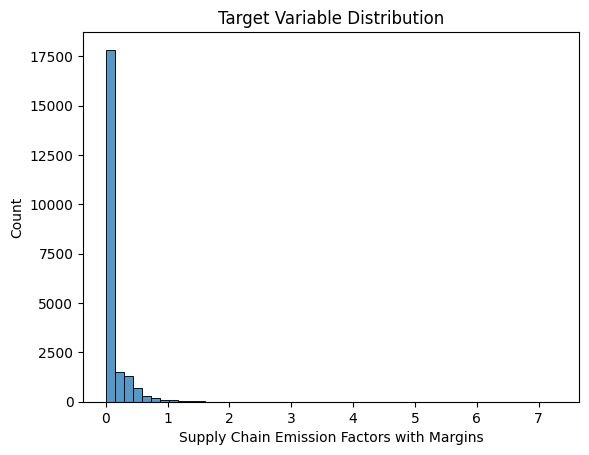

In [12]:
# PLotting a graph of target variables
sns.histplot(df['Supply Chain Emission Factors with Margins'], bins=50)
plt.title('Target Variable Distribution')
plt.show()

In [13]:
# Fixing catagorical variables
print(df['Substance'].value_counts())

Substance
carbon dioxide    5523
methane           5523
nitrous oxide     5523
other GHGs        5523
Name: count, dtype: int64


In [14]:
print(df['Unit'].value_counts())

Unit
kg/2018 USD, purchaser price         16569
kg CO2e/2018 USD, purchaser price     5523
Name: count, dtype: int64


In [15]:
print(df['Source'].value_counts())

Source
Industry     11060
Commodity    11032
Name: count, dtype: int64


#### Now lets convert these catagorical column to numerical type

In [16]:
df['Substance']=df['Substance'].map({'carbon dioxide':0, 'methane':1, 'nitrous oxide':2, 'other GHGs':3})

In [17]:
print(df['Substance'].unique())

[0 1 2 3]


In [18]:
df['Unit']=df['Unit'].map({'kg/2018 USD, purchaser price':0, 'kg CO2e/2018 USD, purchaser price':1})

In [19]:
print(df['Unit'].unique())

[0 1]


In [20]:
df['Source']=df['Source'].map({'Industry':0, 'Commodity':1})

In [21]:
print(df['Source'].unique())

[1 0]


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22092 entries, 0 to 22091
Data columns (total 14 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Code                                                    22092 non-null  object 
 1   Name                                                    22092 non-null  object 
 2   Substance                                               22092 non-null  int64  
 3   Unit                                                    22092 non-null  int64  
 4   Supply Chain Emission Factors without Margins           22092 non-null  float64
 5   Margins of Supply Chain Emission Factors                22092 non-null  object 
 6   Supply Chain Emission Factors with Margins              22092 non-null  float64
 7   DQ ReliabilityScore of Factors without Margins          22092 non-null  int64  
 8   DQ TemporalCorrelation of Factors wi

In [23]:
df.Code.unique()

array(['1111A0', '1111B0', '111200', '111300', '111400', '111900',
       '112120', '1121A0', '112300', '112A00', '113000', '114000',
       '115000', '211000', '212100', '212230', '2122A0', '212310',
       '2123A0', '213111', '21311A', '221100', '221200', '221300',
       '230301', '230302', '233210', '233230', '233240', '233262',
       '2332A0', '2332C0', '2332D0', '233411', '233412', '2334A0',
       '311111', '311119', '311210', '311221', '311224', '311225',
       '311230', '311300', '311410', '311420', '311513', '311514',
       '31151A', '311520', '311615', '31161A', '311700', '311810',
       '3118A0', '311910', '311920', '311930', '311940', '311990',
       '312110', '312120', '312130', '312140', '312200', '313100',
       '313200', '313300', '314110', '314120', '314900', '315000',
       '316000', '321100', '321200', '321910', '3219A0', '322110',
       '322120', '322130', '322210', '322220', '322230', '322291',
       '322299', '323110', '323120', '324110', '324121', '3241

In [24]:
df.Name.unique()

array(['Fresh soybeans, canola, flaxseeds, and other oilseeds',
       'Fresh wheat, corn, rice, and other grains',
       'Fresh vegetables, melons, and potatoes',
       'Fresh fruits and tree nuts',
       'Greenhouse crops, mushrooms, nurseries, and flowers',
       'Tobacco, cotton, sugarcane, peanuts, sugar beets, herbs and spices, and other crops',
       'Dairies', 'Cattle ranches and feedlots', 'Poultry farms',
       'Animal farms and aquaculture ponds (except cattle and poultry)',
       'Timber and raw forest products', 'Wild-caught fish and game',
       'Agriculture and forestry support', 'Unrefined oil and gas',
       'Coal', 'Copper, nickel, lead, and zinc',
       'Iron, gold, silver, and other metal ores', 'Dimensional stone',
       'Sand, gravel, clay, phosphate, other nonmetallic minerals',
       'Well drilling', 'Other support activities for mining',
       'Electricity', 'Natural gas',
       'Drinking water and wastewater treatment',
       'Nonresidential mai

In [25]:
len(df.Name.unique())

713

In [26]:
# Dropping the columns which are not needed
df.drop(columns=['Name','Code','Year'], inplace=True)

In [27]:
df.shape

(22092, 11)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22092 entries, 0 to 22091
Data columns (total 11 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Substance                                               22092 non-null  int64  
 1   Unit                                                    22092 non-null  int64  
 2   Supply Chain Emission Factors without Margins           22092 non-null  float64
 3   Margins of Supply Chain Emission Factors                22092 non-null  object 
 4   Supply Chain Emission Factors with Margins              22092 non-null  float64
 5   DQ ReliabilityScore of Factors without Margins          22092 non-null  int64  
 6   DQ TemporalCorrelation of Factors without Margins       22092 non-null  int64  
 7   DQ GeographicalCorrelation of Factors without Margins   22092 non-null  int64  
 8   DQ TechnologicalCorrelation of Facto

In [32]:
df['Margins of Supply Chain Emission Factors'].unique()

array([0.073, 0.001, 0.0, 0.081, 0.132, 0.121, 0.096, 0.075, 0.057, 0.064,
       0.072, 0.076, 0.11, 0.082, 0.196, 0.002, 0.078, 0.071, 0.128,
       0.173, 0.08, 0.039, 0.037, 0.03, 0.007, 0.099, 0.091, 0.093, 0.058,
       0.063, 0.074, 0.049, 0.059, 0.06, 0.066, 0.061, 0.1, 0.043, 0.045,
       0.01, 0.035, 0.051, 0.117, 0.17, 0.095, 0.089, 0.062, 0.028, 0.25,
       0.921, 0.005, 0.251, 1.901, 0.009, 0.82, 0.004, 0.047, 0.07, 0.056,
       0.034, 0.05, 0.172, 0.052, 0.033, 0.127, 0.069, 0.085, 0.041,
       0.017, 0.018, 0.032, 0.293, 0.188, 0.016, 0.053, 0.024, 0.012,
       0.013, 0.126, 0.021, 0.226, 0.13, 0.109, 0.119, 0.12, 0.161, 0.256,
       0.003, 0.088, 0.036, 0.044, 0.042, 0.02, 0.027, 0.155, 0.04, 0.055,
       0.067, 0.334, 0.294, 0.115, 0.054, 0.112, 0.104, 0.046, 0.038,
       0.029, 0.341, 0.47, 0.193, 0.168, 1.226, 0.006, 0.019, 0.142,
       0.209, 0.229, 0.796, 0.269, 0.217, 0.105, 0.218, 0.09, 0.031,
       0.022, 0.008, 0.011, 0.026, 0.077, 0.068, 0.266, 0.873

### There is a value called 'Main feature', which must be removed

In [34]:
df = df[df['Margins of Supply Chain Emission Factors'] != 'Main feature']

In [35]:
df['Margins of Supply Chain Emission Factors']=df['Margins of Supply Chain Emission Factors'].astype(float)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22091 entries, 0 to 22091
Data columns (total 11 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Substance                                               22091 non-null  int64  
 1   Unit                                                    22091 non-null  int64  
 2   Supply Chain Emission Factors without Margins           22091 non-null  float64
 3   Margins of Supply Chain Emission Factors                22091 non-null  float64
 4   Supply Chain Emission Factors with Margins              22091 non-null  float64
 5   DQ ReliabilityScore of Factors without Margins          22091 non-null  int64  
 6   DQ TemporalCorrelation of Factors without Margins       22091 non-null  int64  
 7   DQ GeographicalCorrelation of Factors without Margins   22091 non-null  int64  
 8   DQ TechnologicalCorrelation of Factors wi

In [37]:
# Defining features and target
X=df.drop(columns={'Supply Chain Emission Factors with Margins'})
y=df['Supply Chain Emission Factors with Margins']

## Step-4 Data Analysis

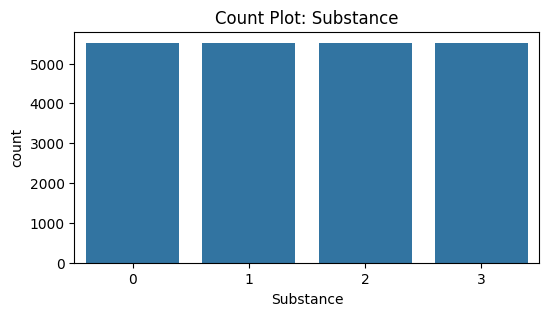

In [38]:
plt.figure(figsize=(6, 3))
sns.countplot(x=df["Substance"])
plt.title("Count Plot: Substance")
plt.show()

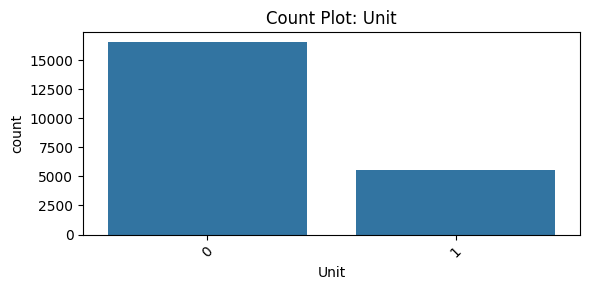

In [39]:
plt.figure(figsize=(6, 3))
sns.countplot(x=df["Unit"])
plt.title("Count Plot: Unit")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

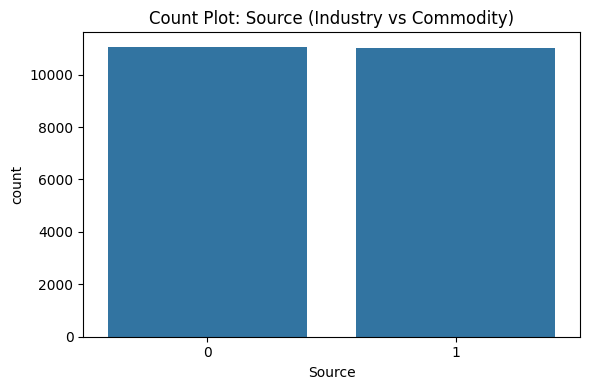

In [40]:
plt.figure(figsize=(6, 4))
sns.countplot(x=df["Source"])
plt.title("Count Plot: Source (Industry vs Commodity)")
plt.tight_layout()
plt.show()

In [41]:
df.select_dtypes(include=np.number).corr()

,Substance,Unit,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins,DQ ReliabilityScore of Factors without Margins,DQ TemporalCorrelation of Factors without Margins,DQ GeographicalCorrelation of Factors without Margins,DQ TechnologicalCorrelation of Factors without Margins,DQ DataCollection of Factors without Margins,Source
Substance,1.000000,0.774618,-0.391847,-0.218398,-0.421599,0.095068,-0.000018,NaN,0.198398,NaN,0.000020
Unit,0.774618,1.000000,-0.155869,-0.094305,-0.169751,-0.025124,0.000023,NaN,0.287033,NaN,-0.000026
Supply Chain Emission Factors without Margins,-0.391847,-0.155869,1.000000,0.143003,0.962971,-0.097985,0.009296,NaN,0.148432,NaN,-0.027146
Margins of Supply Chain Emission Factors,-0.218398,-0.094305,0.143003,1.000000,0.404540,-0.069591,0.007960,NaN,0.086347,NaN,0.067498
Supply Chain Emission Factors with Margins,-0.421599,-0.169751,0.962971,0.404540,1.000000,-0.109478,0.010762,NaN,0.160598,NaN,-0.006703
DQ ReliabilityScore of Factors without Margins,0.095068,-0.025124,-0.097985,-0.069591,-0.109478,1.000000,-0.021763,NaN,0.073513,NaN,0.012351
DQ TemporalCorrelation of Factors without Margins,-0.000018,0.000023,0.009296,0.007960,0.010762,-0.021763,1.000000,NaN,-0.030655,NaN,0.000039
DQ GeographicalCorrelation of Factors without Margins,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DQ TechnologicalCorrelation of Factors without Margins,0.198398,0.287033,0.148432,0.086347,0.160598,0.073513,-0.030655,NaN,1.000000,NaN,-0.028219
DQ DataCollection of Factors without Margins,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


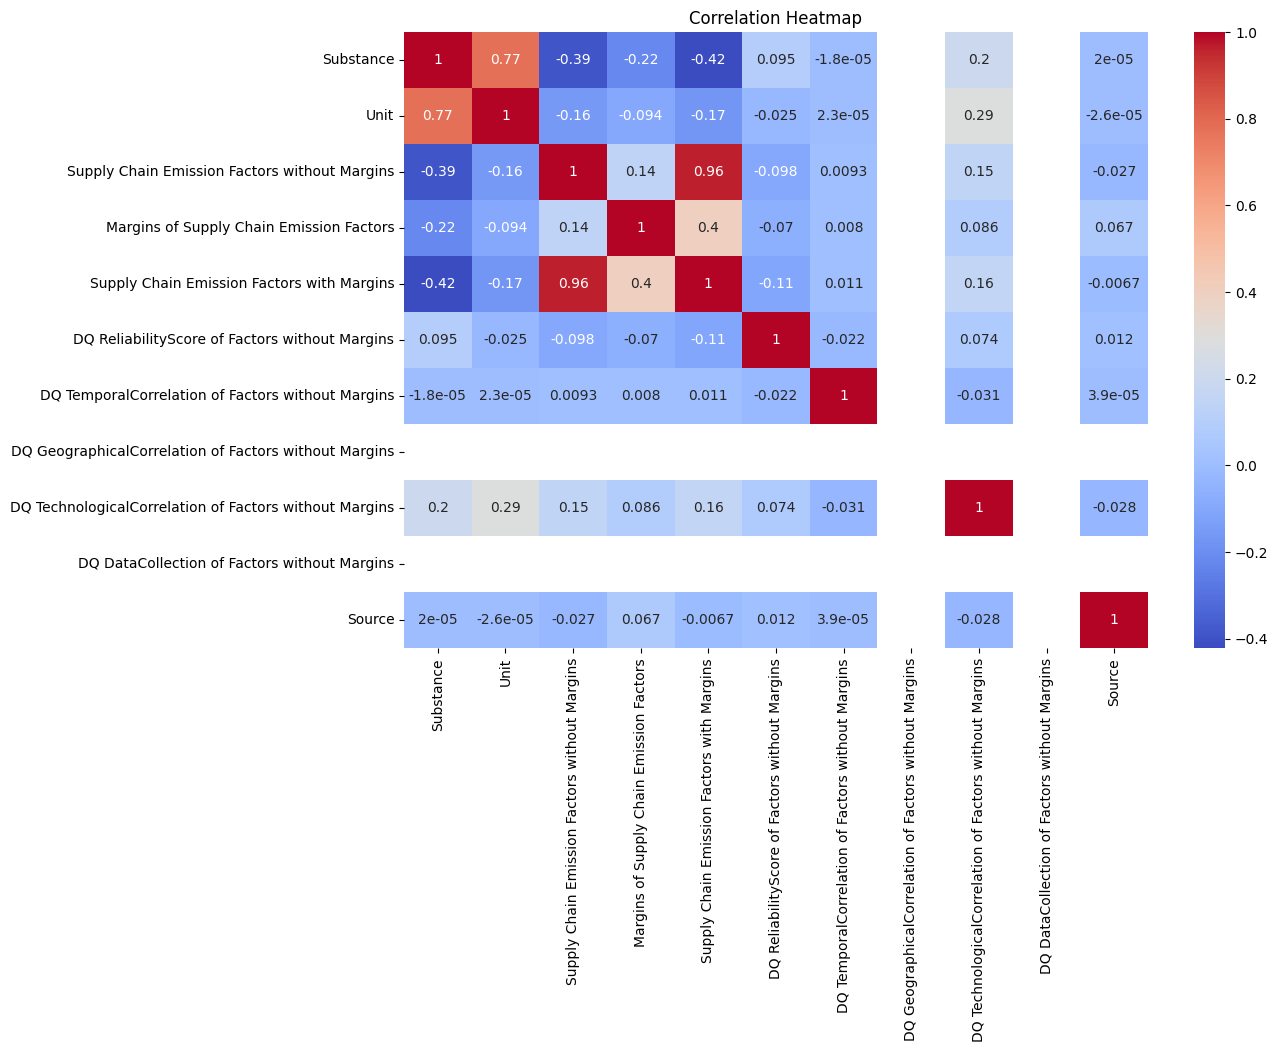

In [43]:
# Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

## Step-5 Normalize features

In [44]:
X.dtypes

Substance                                                   int64
Unit                                                        int64
Supply Chain Emission Factors without Margins             float64
Margins of Supply Chain Emission Factors                  float64
DQ ReliabilityScore of Factors without Margins              int64
DQ TemporalCorrelation of Factors without Margins           int64
DQ GeographicalCorrelation of Factors without Margins       int64
DQ TechnologicalCorrelation of Factors without Margins      int64
DQ DataCollection of Factors without Margins                int64
Source                                                      int64
dtype: object

In [45]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Step-6 Divide the data into train and test data

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

## Step-7 Select a model for training

In [47]:
model = RandomForestRegressor(random_state=42)

In [48]:
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

## Step-8 Prediction and Evaluation

In [49]:
y_pred = model.predict(X_test)

In [50]:
# r2_score: when this values is closer to 1 it indicates that it is a good model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'RMSE: {rmse}')
print(f'R² Score: {r2}')

RMSE: 0.004929571768221038
R² Score: 0.9996800524838413


## Step-9 Hyperparameter tuning

In [51]:
# When the model performs very well on the training data i.e r2_score is 1 then we say that it is overfit 

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}
#  GridSearchCV is a function in scikit-learn used to find the best combination of hyperparameters,
#  for a machine learning model by performing exhaustive search with cross-validation.
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=3, n_jobs=-1)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}


### Use these parameter for prediction

In [52]:
y_pred_best = best_model.predict(X_test)

print("Final RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_best)))
print("Final R²:", r2_score(y_test, y_pred_best))

Final RMSE: 0.004972996484878884
Final R²: 0.9996743908054836


### The  model  before hypertuning is giving better results considering it as final model

## Step-10 Save Models and encoders

In [53]:
!mkdir models

In [54]:
# Save model and encoders
joblib.dump(model, 'models/final_model.pkl')   
joblib.dump(scaler, 'models/scaler.pkl')

['models/scaler.pkl']